In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [4]:
#Create a file path
path= r'C:\Users\Zinnia\Documents\Career Foundry Data Analytics Course\Achievement 6\Data\Edited 8_13_22'

In [5]:
#Import Data
df=pd.read_csv(os.path.join(path, 'Edited_Municipal_Data_Merged.csv'), index_col=False)

In [6]:
#Check matplotlib version
matplotlib.__version__

'3.4.3'

In [7]:
#Doing this to ensure the charts are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# Check and Clean Data

In [8]:
#Check the shape
df.shape

(548, 12)

In [9]:
#Look at column names
df.columns

Index(['County_x', 'Municipality', '2021: Area', '2021: Census Population',
       '2020: Workforce', '2020: % Unemployed',
       '2020: Average Residential Property Value ($)',
       '2020: Municipal Budget per Capita ($)', '2018: % Democrats',
       '2018: % Republicans', 'Total_Acres', 'Total_Acres_Open_Space'],
      dtype='object')

In [10]:
df.head()

,County_x,Municipality,2021: Area,2021: Census Population,2020: Workforce,2020: % Unemployed,2020: Average Residential Property Value ($),2020: Municipal Budget per Capita ($),2018: % Democrats,2018: % Republicans,Total_Acres,Total_Acres_Open_Space
0,Atlantic,Absecon,5.47,9137,4437,17.33,170824.0,1240,29.76,28.89,3499.52,390.772836
1,Atlantic,Atlantic City,10.76,38497,15995,25.71,144901.0,5609,94.97,9.41,6886.40,941.670537
2,Atlantic,Brigantine,6.52,7716,4182,14.78,383187.0,3562,22.24,42.13,4174.08,3116.170626
3,Atlantic,Buena,7.57,4501,1800,12.67,160417.0,1160,26.02,28.02,4846.72,309.927139
4,Atlantic,Buena Vista,41.08,7033,3052,14.29,207713.0,709,35.38,24.35,26291.20,2779.443567


In [11]:
#Check for duplicates
df[df.duplicated()]

,County_x,Municipality,2021: Area,2021: Census Population,2020: Workforce,2020: % Unemployed,2020: Average Residential Property Value ($),2020: Municipal Budget per Capita ($),2018: % Democrats,2018: % Republicans,Total_Acres,Total_Acres_Open_Space


In [12]:
#Check for missing values
df.isnull().sum()

County_x                                        0
Municipality                                    0
2021: Area                                      0
2021: Census Population                         0
2020: Workforce                                 0
2020: % Unemployed                              0
2020: Average Residential Property Value ($)    1
2020: Municipal Budget per Capita ($)           0
2018: % Democrats                               0
2018: % Republicans                             0
Total_Acres                                     0
Total_Acres_Open_Space                          0
dtype: int64

In [13]:
#Mixed type data check
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
#None found

In [14]:
df.columns

Index(['County_x', 'Municipality', '2021: Area', '2021: Census Population',
       '2020: Workforce', '2020: % Unemployed',
       '2020: Average Residential Property Value ($)',
       '2020: Municipal Budget per Capita ($)', '2018: % Democrats',
       '2018: % Republicans', 'Total_Acres', 'Total_Acres_Open_Space'],
      dtype='object')

In [16]:
#Check data types
df.dtypes

County_x                                         object
Municipality                                     object
2021: Area                                      float64
2021: Census Population                           int64
2020: Workforce                                   int64
2020: % Unemployed                              float64
2020: Average Residential Property Value ($)    float64
2020: Municipal Budget per Capita ($)             int64
2018: % Democrats                               float64
2018: % Republicans                             float64
Total_Acres                                     float64
Total_Acres_Open_Space                          float64
dtype: object

In [17]:
#check for mixed data types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

# Look for Correlations in the Data

In [18]:
df.corr()

,2021: Area,2021: Census Population,2020: Workforce,2020: % Unemployed,2020: Average Residential Property Value ($),2020: Municipal Budget per Capita ($),2018: % Democrats,2018: % Republicans,Total_Acres,Total_Acres_Open_Space
2021: Area,1.000000,0.170550,0.172751,0.002005,-0.139443,-0.139783,-0.301644,0.239004,0.968771,0.810850
2021: Census Population,0.170550,1.000000,0.973104,0.158985,-0.064697,-0.111933,0.326368,-0.373808,0.180839,0.034560
2020: Workforce,0.172751,0.973104,1.000000,0.148320,-0.057116,-0.115992,0.337354,-0.384112,0.182645,0.035562
2020: % Unemployed,0.002005,0.158985,0.148320,1.000000,-0.281197,0.001039,0.263862,-0.267089,0.004606,0.034606
2020: Average Residential Property Value ($),-0.139443,-0.064697,-0.057116,-0.281197,1.000000,0.172601,-0.158827,0.141825,-0.139236,-0.092034
2020: Municipal Budget per Capita ($),-0.139783,-0.111933,-0.115992,0.001039,0.172601,1.000000,-0.074763,0.181035,-0.140288,-0.090868
2018: % Democrats,-0.301644,0.326368,0.337354,0.263862,-0.158827,-0.074763,1.000000,-0.857106,-0.314554,-0.260838
2018: % Republicans,0.239004,-0.373808,-0.384112,-0.267089,0.141825,0.181035,-0.857106,1.000000,0.248325,0.235781
Total_Acres,0.968771,0.180839,0.182645,0.004606,-0.139236,-0.140288,-0.314554,0.248325,1.000000,0.816505
Total_Acres_Open_Space,0.810850,0.034560,0.035562,0.034606,-0.092034,-0.090868,-0.260838,0.235781,0.816505,1.000000


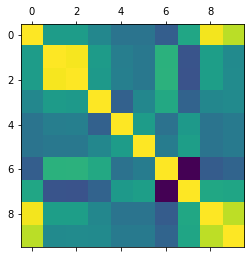

In [19]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

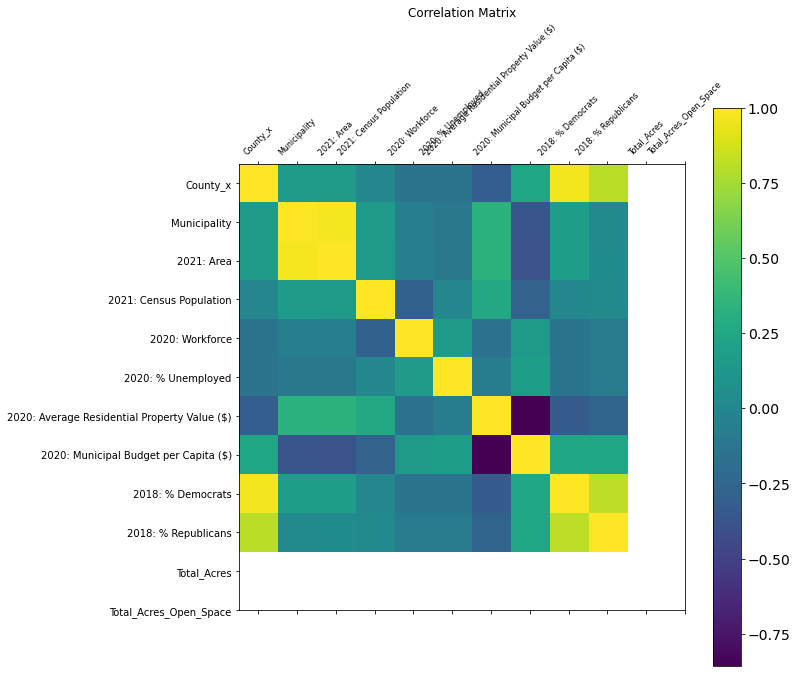

In [20]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10,10)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title

#I am not sure why my acreage is showing up in the table but not on the heat map. The tick marks also seem to be in the wrong place compared to the column labels.
I find it interesting that I have yellow squares in the corner (total acres/county) as well as the expected ones in the middle. 

The workforce/unemployment is the highest correlation after the yellow squares. 

There's also a high property value/population correlation. 

Avg Property values/Municipality is another around 50%. 

Avg property values/Area was another. 

% Unemployed/Republicans was another and workforce/republicans. 

Democrats/Municipality and Democrats/Area appear to have a correlation.

Unfortunately can't make a scatterplot for categorical variables so some of these can't be visuaized below. 

# Scatter Plots

In [21]:
df.columns

Index(['County_x', 'Municipality', '2021: Area', '2021: Census Population',
       '2020: Workforce', '2020: % Unemployed',
       '2020: Average Residential Property Value ($)',
       '2020: Municipal Budget per Capita ($)', '2018: % Democrats',
       '2018: % Republicans', 'Total_Acres', 'Total_Acres_Open_Space'],
      dtype='object')

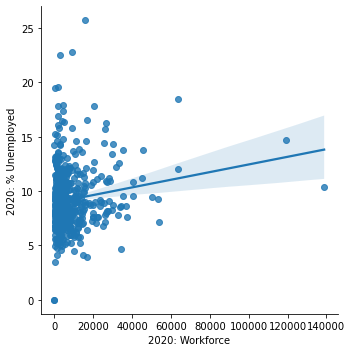

In [22]:
# Create a scatterplot 

sns.lmplot(x = '2020: Workforce', y = '2020: % Unemployed', data = df)

#The data shows a cluster where a lower workforce population and unemployment are both typically low. A few outliers skew this to be a positive correlation but there is not a linear interdependence

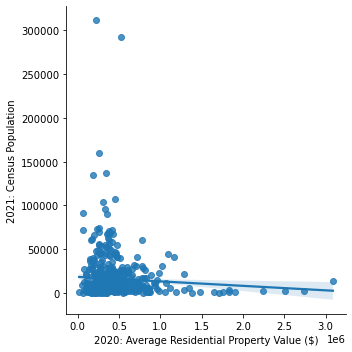

In [23]:
# Create a scatterplot 

sns.lmplot(x = '2020: Average Residential Property Value ($)', y = '2021: Census Population', data = df)

#This graph is unusual. Most property values are low and the population is low. There are a few outliers with large populations in low value areas and with high values in low population areas. The line of best fit is negative and overall there doesn't appear to be linear interdependence. 

# Pair Plots

In [24]:
# Create a subset 

sub = df[['County_x', 'Municipality', 'Total_Acres', '2021: Area', '2021: Census Population']]

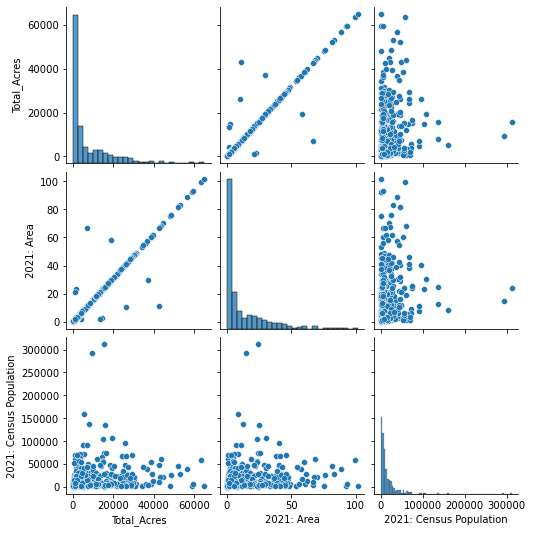

In [25]:
# Create a pair plot 

g = sns.pairplot(sub)

In [33]:
sub2= df[['County_x', 'Municipality', '2021: Area', '2021: Census Population',
       '2020: Workforce', '2020: % Unemployed',
       '2020: Average Residential Property Value ($)', '2018: % Democrats',
       '2018: % Republicans', 'Total_Acres']]

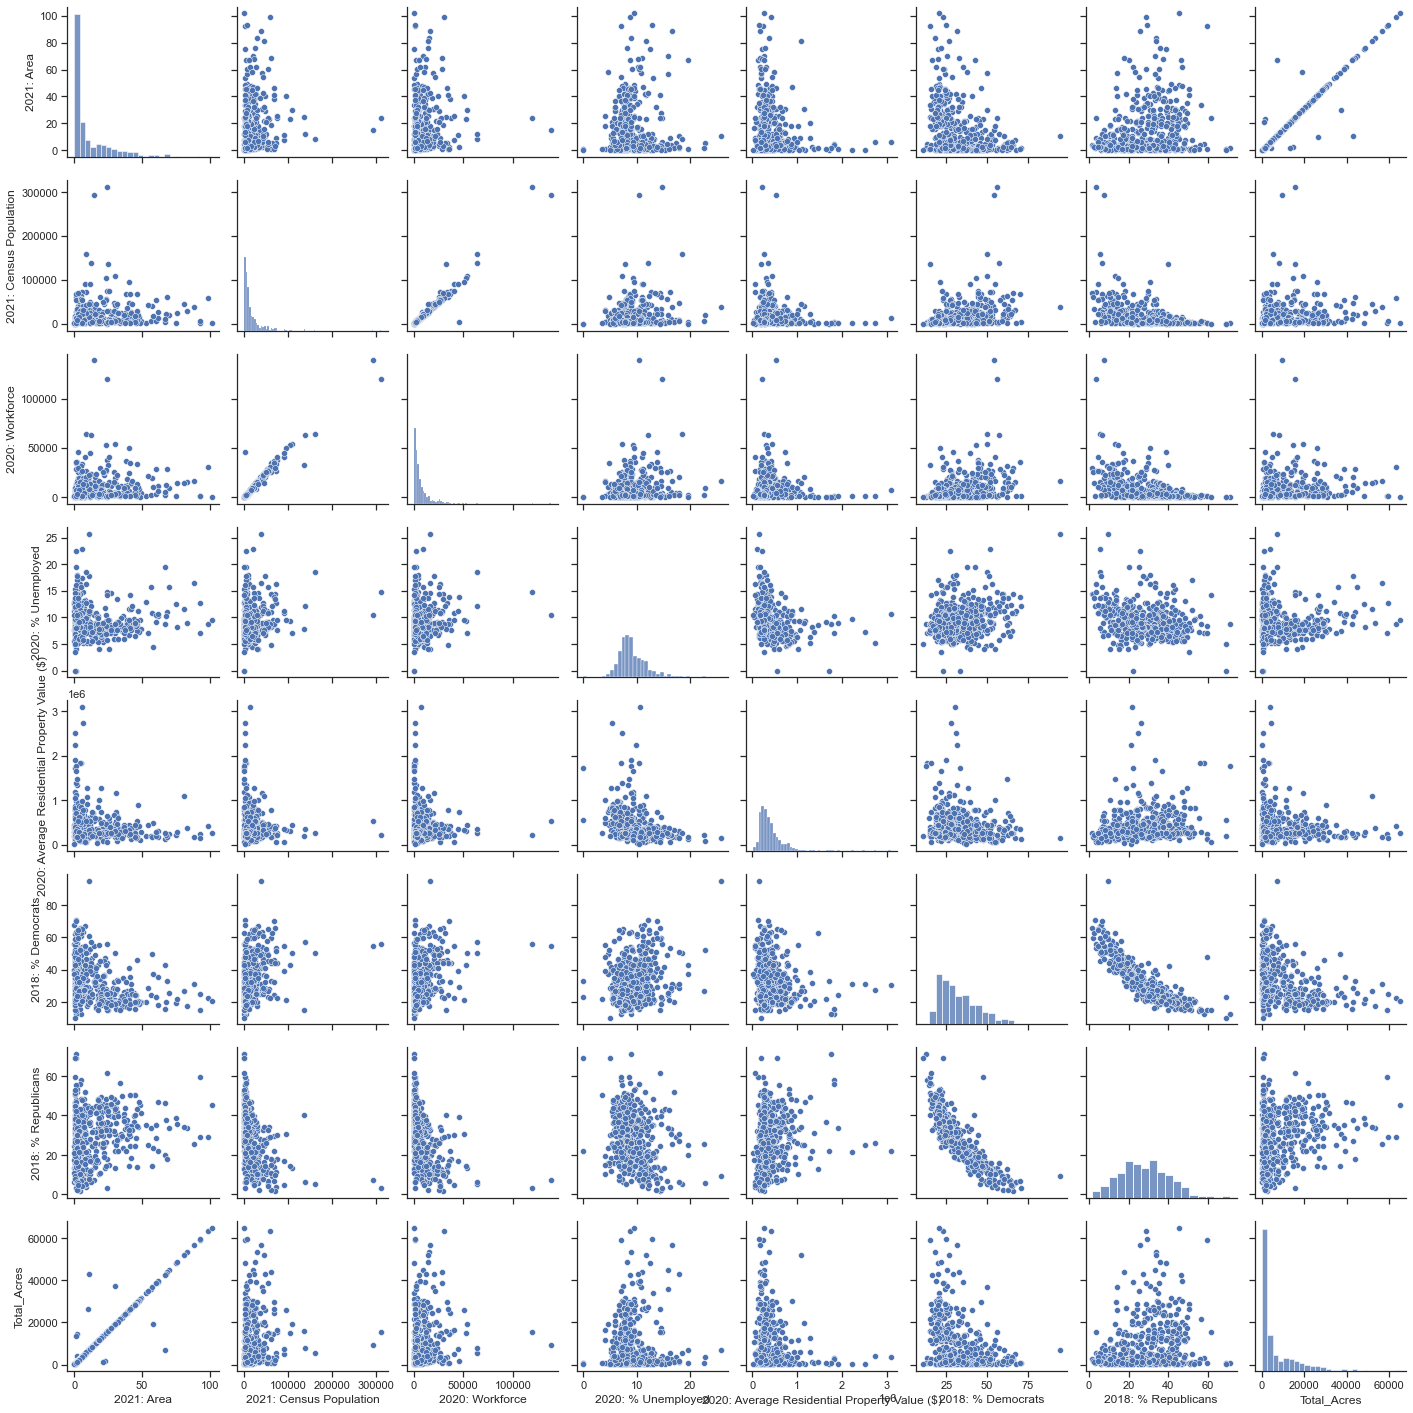

In [34]:
# Create a pair plot 

g2 = sns.pairplot(sub2)

Variables to explore further:
Area and Total Acres

Correlated but irrelevent: population and workforce

# Categorical Plot

In [28]:
df.columns

Index(['County_x', 'Municipality', '2021: Area', '2021: Census Population',
       '2020: Workforce', '2020: % Unemployed',
       '2020: Average Residential Property Value ($)',
       '2020: Municipal Budget per Capita ($)', '2018: % Democrats',
       '2018: % Republicans', 'Total_Acres', 'Total_Acres_Open_Space'],
      dtype='object')

<AxesSubplot:xlabel='Total_Acres', ylabel='Count'>

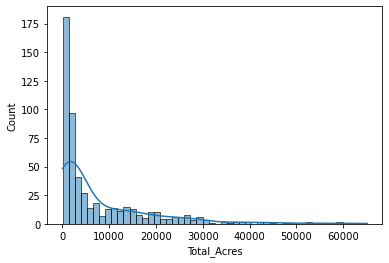

In [29]:
sns.histplot(df['Total_Acres'], bins = 50, kde = True)

In [30]:
df.loc[df['Total_Acres'] < 20, 'Acres'] = 'Low Acreage'
df.loc[(df['Total_Acres'] >= 20) & (df['Total_Acres'] < 50), 'Acres'] = 'Medium Acreage'
df.loc[df['Total_Acres'] >= 50, 'Acres'] = 'Large Acreage'

In [31]:
df['Total_Acres'].value_counts(dropna = False)

379.52      3
1326.08     2
1880.96     2
1410.56     2
823.68      2
           ..
986.24      1
183.04      1
750.72      1
39697.28    1
17514.24    1
Name: Total_Acres, Length: 538, dtype: int64

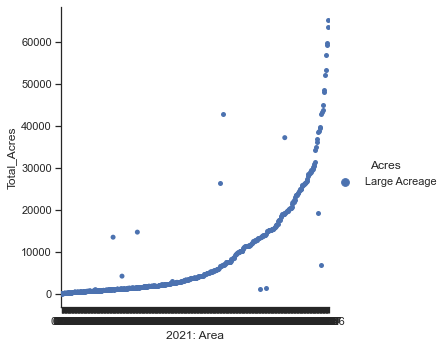

In [32]:
# Create a categorical plot in seaborn

sns.set(style="ticks")
g = sns.catplot(x="2021: Area", y="Total_Acres", hue="Acres", data=df)

#There are a few outliers but this is showing a general trend of more acreage preserved when there is more area, up to a set point. I'm surprised its parabolic and not linear. This may suggest the trend is less prominent with lower acreage areas and is more pronounced in larger acreage municipalities.

# Revisit Exploratory Questions
Does the area of the municipality correlate to the area of preserved open space? Not strongly. Smaller area does show smaller preserved acreage but three is a lot of variability for municiaplities with a small area and there isn't a linear interdependence.

Does the size of the population correlate to the amount of preserved open space? No

Is unemployment rate correlated to the amount of preserved open space? No

Do communities with different political views have significant differences in open space? No

Is open space related to average property values? No, areas with low total acreage preserved can still have high property values (other variables like acccess to businesses and transit may be related to this)

# Hypothesis
If there is more acreage in a municipality, then the municipality will have more preserved open space

